In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
#Graphing libraries
import plotly.graph_objs as go
import plotly.io as pio
pio.templates.default = "plotly_dark"


In [32]:
years = [x for x in range(2015,2020)]
df={}
for year in years:
    url = f"../UWA-Project/Output/{year}.csv"
    pd.set_option("display.max_rows",800)
    df[year] = pd.read_csv(url)
    
url_concat = f"../UWA-Project/Output/concated_df.csv"
df_concat = pd.read_csv(url_concat)
#Unpacking the df
df_2015,df_2016,df_2017,df_2018,df_2019 = df[2015],df[2016],df[2017],df[2018],df[2019]

In [33]:
for year in years:
    print(f"""{year} \n{df[year].columns}
----------""")

2015 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2016 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2017 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual'],
      dtype='object')
----------
2018 
Index(['Country', 'Happiness_Rank', 'Happiness_Score',
       'Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_R

In [34]:
df[2016].tail(10)

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
147,Madagascar,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


# Horizontal Bars

In [35]:
top_10 = {}
bottom_10 = {}
combined_10 = {}

for year in years:
        top_10[year] =df[year].set_index('Country')
        top_10[year] = df[year].loc[:,['Country','Economy_(GDP_per_Capita)','Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']].head(10)
        bottom_10[year] = df[year].set_index('Country')
        bottom_10[year] = df[year].loc[:,['Country','Economy_(GDP_per_Capita)','Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity',
       'Dystopia_Residual']].tail(10)
        combined_10[year] = pd.concat([bottom_10[year][::-1],top_10[year][::-1]]).set_index('Country',drop=True)
#         combined_10[year].iplot(kind='barh',title= f'{year} Top-Bottom Analysis',barmode='stack',bargap=.3)
        fig =px.bar(combined_10[year], color_discrete_sequence = px.colors.colorbrewer.Paired,orientation='h',title= f'{year} Top-Bottom Analysis',barmode='stack', labels=dict(Country="Countries", value="Happiness Score", variable="Contributing Factors"))
        fig.show()


# Correlational Heatmaps

Cor-relational heatmap - 2015


<Figure size 720x432 with 0 Axes>

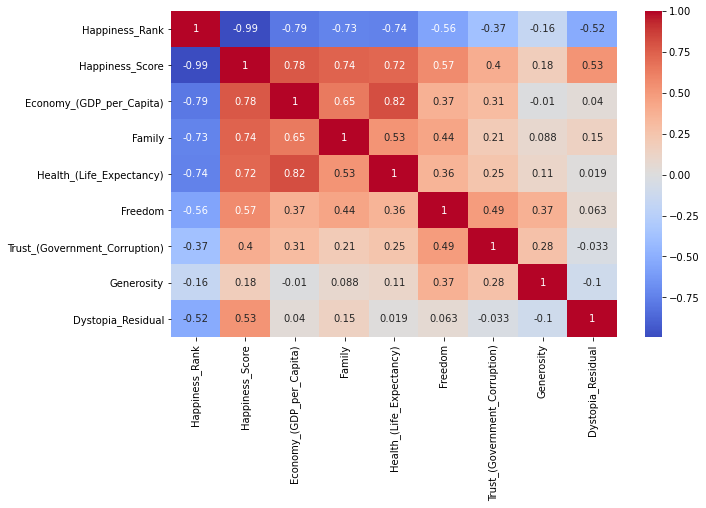

Cor-relational heatmap - 2016


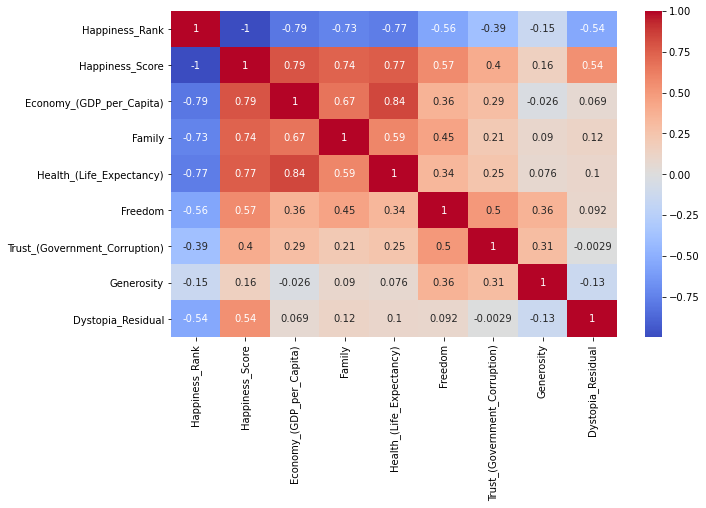

Cor-relational heatmap - 2017


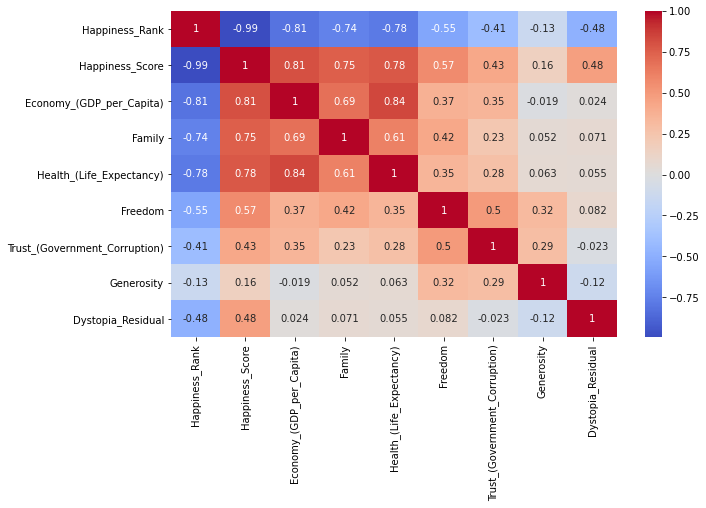

Cor-relational heatmap - 2018


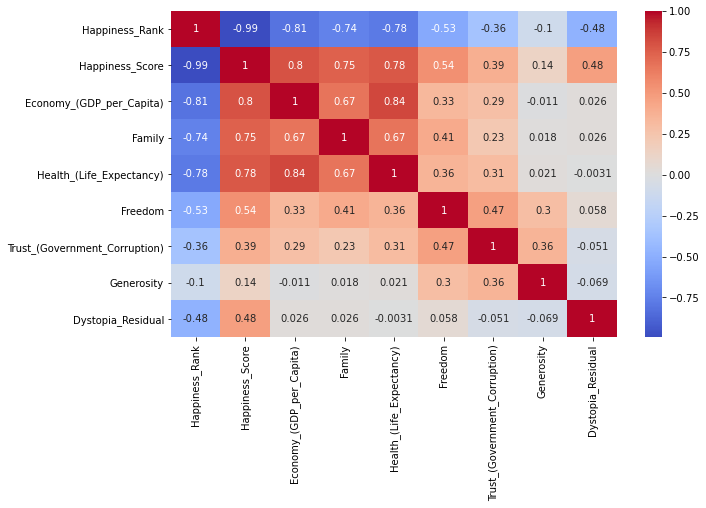

Cor-relational heatmap - 2019


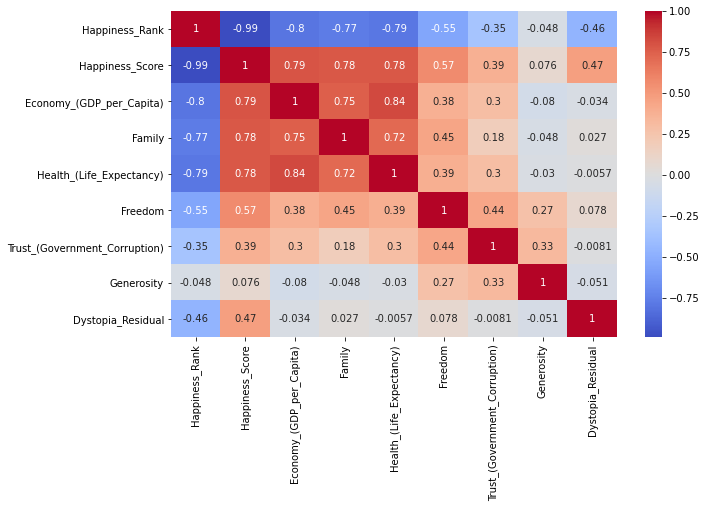

In [36]:
plt.figure(figsize=(10,6))
heatmap_corr={}
for enum,year in enumerate(years,start=1):
    heatmap_corr[year] = df[year]
    fig = plt.figure(figsize=(10,6))
    print(f"Cor-relational heatmap - {year}")
    sns.heatmap(heatmap_corr[year].corr(),cmap='coolwarm', annot=True)
    plt.show()
    

    
    

In [37]:
df_concat.sort_values('year',inplace=True)
df_concat

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
309,Croatia,62,5.759,1.082540,0.796240,0.788050,0.258830,0.024300,0.054440,2.754140,2015
313,Libya,63,5.754,1.131450,1.118620,0.703800,0.416680,0.110230,0.182950,2.090660,2015
319,Russia,64,5.716,1.137640,1.236170,0.669260,0.366790,0.030050,0.001990,2.273940,2015
323,Jamaica,65,5.709,0.810380,1.151020,0.687410,0.504420,0.022990,0.212300,2.320380,2015
329,North Cyprus,66,5.695,1.208060,1.070080,0.923560,0.490270,0.142800,0.261690,1.598880,2015
330,Cyprus,67,5.689,1.208130,0.893180,0.923560,0.406720,0.061460,0.306380,1.889310,2015
338,Algeria,68,5.605,0.939290,1.077720,0.617660,0.285790,0.173830,0.078220,2.432090,2015
344,Kosovo,69,5.589,0.801480,0.811980,0.631320,0.247490,0.047410,0.283100,2.765790,2015
349,Turkmenistan,70,5.548,0.958470,1.226680,0.538860,0.476100,0.308440,0.169790,1.869840,2015


In [38]:
fig = px.scatter(df_concat, x="Economy_(GDP_per_Capita)", y="Health_(Life_Expectancy)", animation_frame="year", animation_group="Country",size="Happiness_Score", hover_name="Country",color="Family",range_x=[0.01,5],range_y=[-5,5], log_x=True, size_max=35)# ,color_continuous_scale='Inferno',color="continent"

# fig["layout"].pop("updatemenus") # optional, drop animation buttons

# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'linear',
#         tick0 = 0,
#         dtick = 0.5
#     )
# )
fig.show()

In [39]:
df[2016]

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [40]:
aus_data = df[2016].loc[df[2016]['Country']=='Australia'].values
top_data = df[2016].iloc[0,:].values
country_name = top_data[0]
top_data[3:-1]
aus_data[0][3:-1]
country_name

'Denmark'

In [41]:

categories = ['Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
       'Freedom', 'Trust_(Government_Corruption)', 'Generosity']

fig = go.Figure()
aus_data ={}
top_data = {}
country_name = {}
for year in years:
    aus_data[year] = df[year].loc[df[year]['Country']=='Australia'].values
    top_data[year]  = df[year].iloc[0,:].values
    country_name[year]  = top_data[year][0]
  
    
fig.add_trace(go.Scatterpolar(
          r=top_data[2019][3:-1],
          theta=categories,
          fill='toself',
          name=f'{country_name[year]}'
    ))
fig.add_trace(go.Scatterpolar(
          r=aus_data[2019][0][3:-1],
          theta=categories,
          fill='toself',
          name='Australia'
    ))

fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 2]
        )),
      showlegend=True
    )

fig.show()



In [42]:
import pycountry_convert as pc
for index,rows in df_concat.iterrows():
    count = 0
    try:
        country_code = pc.country_name_to_country_alpha2(rows['Country'], cn_name_format="default")
#         print(country_code)
        df_concat.loc[index,'region'] = pc.country_alpha2_to_continent_code(country_code)
        
    except:
        
        pass



In [43]:
df_concat.loc[df_concat['region'].isnull()]    

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year,region
329,North Cyprus,66,5.695,1.208060,1.070080,0.923560,0.490270,0.142800,0.261690,1.598880,2015,NaN
344,Kosovo,69,5.589,0.801480,0.811980,0.631320,0.247490,0.047410,0.283100,2.765790,2015,NaN
450,Somaliland region,91,5.057,0.188470,0.951520,0.438730,0.465820,0.399280,0.503180,2.110320,2015,NaN
691,Congo (Brazzaville),139,3.989,0.678660,0.662900,0.310510,0.414660,0.116860,0.123880,1.681350,2015,NaN
535,Palestinian Territories,108,4.715,0.598670,0.925580,0.660150,0.244990,0.129050,0.112510,2.043840,2015,NaN
597,Congo (Kinshasa),120,4.517,0.000000,1.001200,0.098060,0.226050,0.076250,0.248340,2.867120,2015,NaN
483,Somaliland Region,97,5.057,0.255580,0.758620,0.331080,0.391300,0.367940,0.514790,2.438010,2016,NaN
308,North Cyprus,62,5.771,1.311410,0.818260,0.841420,0.435960,0.165780,0.263220,1.934470,2016,NaN
383,Kosovo,77,5.401,0.901450,0.660620,0.540000,0.143960,0.065470,0.279920,2.809980,2016,NaN
537,Palestinian Territories,108,4.754,0.670240,0.716290,0.568440,0.177440,0.106130,0.111540,2.403640,2016,NaN


In [47]:
df_concat = df_concat.loc[~df_concat['region'].isnull()] 
df_concat

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,year,region
0,Switzerland,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015,EU
309,Croatia,62,5.759,1.082540,0.796240,0.788050,0.258830,0.024300,0.054440,2.754140,2015,EU
313,Libya,63,5.754,1.131450,1.118620,0.703800,0.416680,0.110230,0.182950,2.090660,2015,AF
319,Russia,64,5.716,1.137640,1.236170,0.669260,0.366790,0.030050,0.001990,2.273940,2015,EU
323,Jamaica,65,5.709,0.810380,1.151020,0.687410,0.504420,0.022990,0.212300,2.320380,2015,NA
330,Cyprus,67,5.689,1.208130,0.893180,0.923560,0.406720,0.061460,0.306380,1.889310,2015,AS
338,Algeria,68,5.605,0.939290,1.077720,0.617660,0.285790,0.173830,0.078220,2.432090,2015,AF
349,Turkmenistan,70,5.548,0.958470,1.226680,0.538860,0.476100,0.308440,0.169790,1.869840,2015,AS
354,Mauritius,71,5.477,1.007610,0.985210,0.709500,0.560660,0.075210,0.377440,1.761450,2015,AF
359,Hong Kong,72,5.474,1.386040,1.058180,1.013280,0.596080,0.371240,0.394780,0.654290,2015,AS


In [55]:
fig = px.scatter(df_concat, x="Economy_(GDP_per_Capita)", y="Happiness_Score", animation_frame="year", animation_group="Country",size="Happiness_Score", hover_name="Country",color="region",range_x=[0.01,5],range_y=[0,10], log_x=True, size_max=15,facet_col='region',facet_col_wrap=2)# ,color_continuous_scale='Inferno',color="continent"

# fig["layout"].pop("updatemenus") # optional, drop animation buttons

# fig.update_layout(
#     xaxis = dict(
#         tickmode = 'linear',
#         tick0 = 0,
#         dtick = 0.5
#     )
# )
fig.show()